In [367]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("insurance.csv")

#Find the duplicates
print("")
print("")

print("sum of duplicate value : ",df.duplicated().sum())
#There is on duplicate value


#Find null values

print("")
print("")

print("Null Values: ")
print(df.isnull().sum())
#There are no Null values

#Correlation 
print("")
print("")

print("Correlation between features: ")
print(df.corr())

print("")
print("")

print(df.info())
#There are 3 columns which are having categorical or Text data. 

print(df.describe())




sum of duplicate value :  1


Null Values: 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Correlation between features: 
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     ch

/var/folders/p4/fw9lt2h52bbbcpcmkgxwwwlw0000gq/T/ipykernel_10926/4143541754.py:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


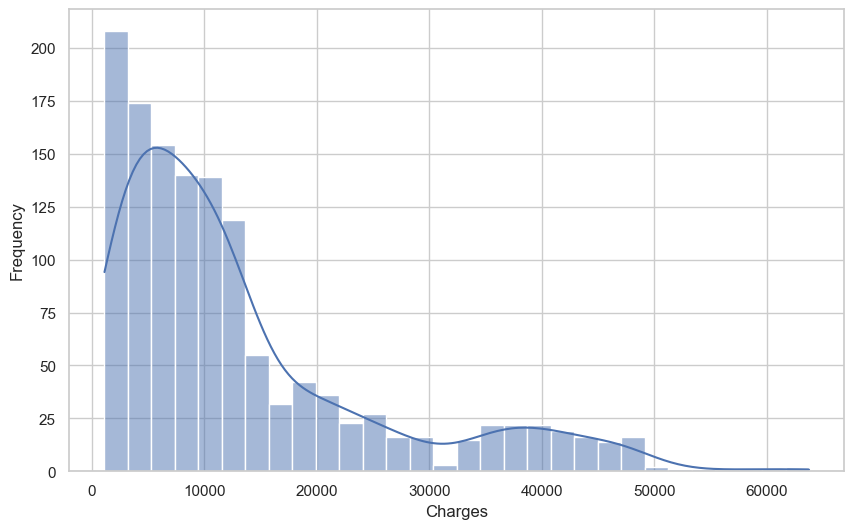

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df["charges"],bins=30,kde=True)
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

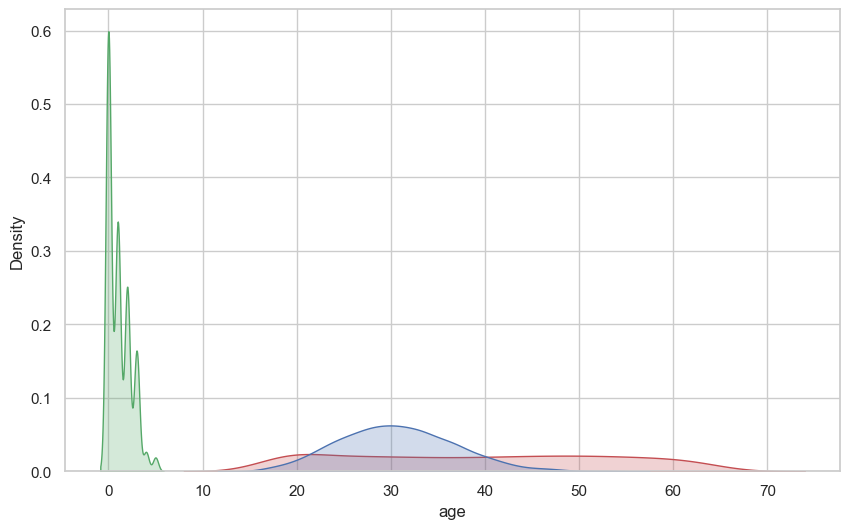

In [96]:

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

# plot 3 variables on density graph
p1=sns.kdeplot(df['age'], fill=True, color="r")
p1=sns.kdeplot(df['bmi'], fill=True, color="b")
p1=sns.kdeplot(df['children'], fill=True, color="g")
plt.show()

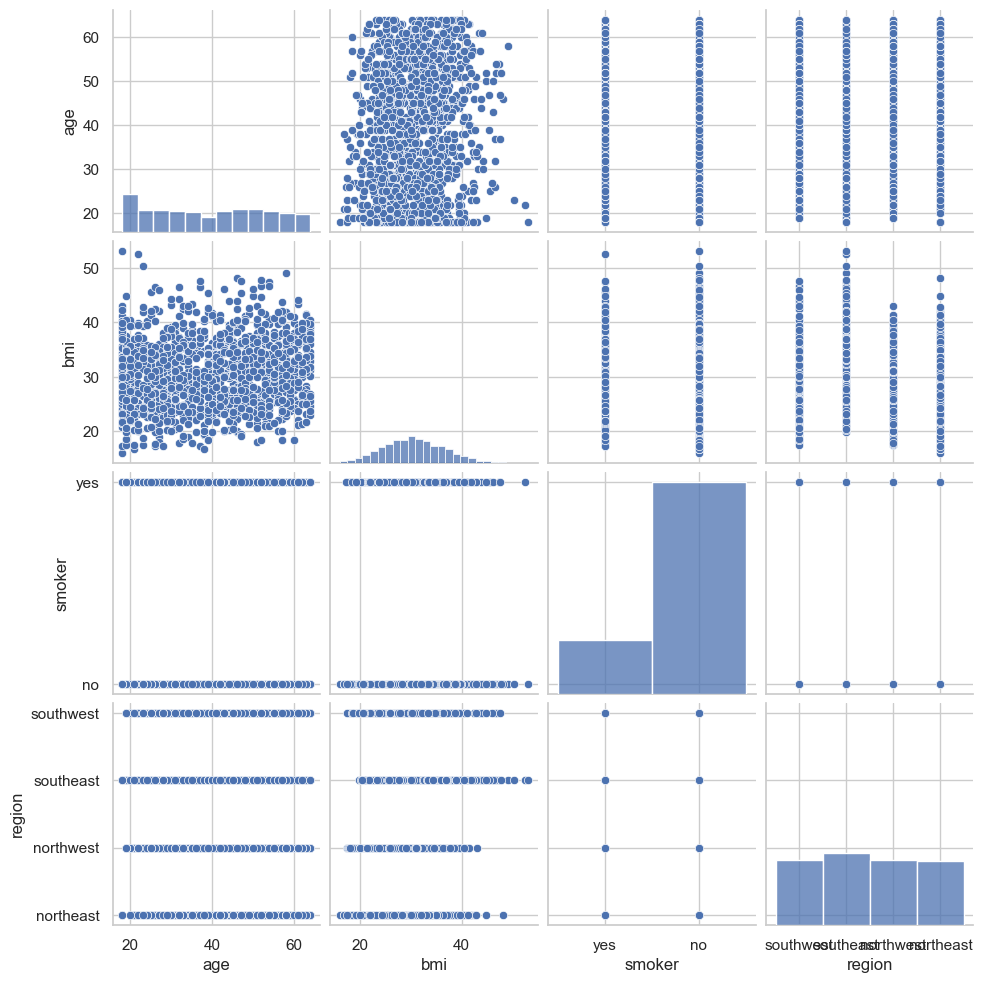

In [126]:
# pairplot with Seaborn lib
sns.pairplot(df,vars=["age","bmi","smoker","region"])


/var/folders/p4/fw9lt2h52bbbcpcmkgxwwwlw0000gq/T/ipykernel_10926/1887514962.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
/var/folders/p4/fw9lt2h52bbbcpcmkgxwwwlw0000gq/T/ipykernel_10926/1887514962.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True)


<Axes: >

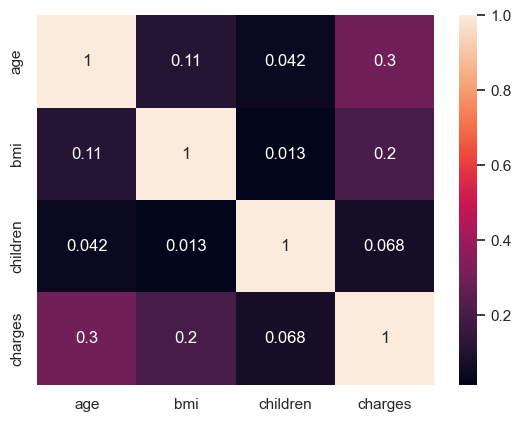

In [99]:
#Correlation between all features
df.corr()
sns.heatmap(data=df.corr(),annot=True)

In [368]:

from sklearn.model_selection import train_test_split

#df.columns.size
X = df.iloc[:,0:df.columns.size-1]
Y = df.iloc[:,-1]

#Data split Case 1 : Train = 80 % Test = 20%
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,Y,test_size=0.2,random_state=2)


#Data split Case 2 : Train = 10 % Test = 90%
x_train2,x_test2,y_train2,y_test2 = train_test_split(X,Y,test_size=0.9,random_state=2)




In [369]:
# Performaing Model Building using Normal SK-Learn Lib

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns



#Convert Categorical Values into Numbers 

#Prepare Map for Categorical Columns

#First Check Unique values and prepare map
X["smoker"].unique()
smoker_map = {'yes': 1, 'no' : 0}
X["sex"].unique()
sex_map = {'female':1,'male':2}
X["region"].unique()
region_map = {'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}
X
smoker_data = X["smoker"].map(smoker_map)
sex_data = X["sex"].map(sex_map)
region_data = X["region"].map(region_map)
#smoker_data
#sex_data
#region_data

#Create new copy of dataFrame X to update the columns
X_tranformed = X.copy()
X_tranformed
X_tranformed["smoker"] = smoker_data
X_tranformed["sex"] = sex_data
X_tranformed["region"] = region_data

X_tranformed

#########Case 1 : Train = 80 % Test = 20%#########
X_train,X_test,Y_train,Y_test = train_test_split(X_tranformed,Y, test_size=0.2, random_state=9)

lr = LinearRegression()
lr.fit(X_train,Y_train)
print("Case 1 : Train = 80 % Test = 20% Output")
print("Intercept",lr.intercept_)
print("Coefficient",lr.coef_)

#Predict Y 
Y_Pred = lr.predict(X_test)
print("Mean Absolute Error :",mean_absolute_error(Y_test,Y_Pred))
mse = mean_squared_error(Y_test,Y_Pred)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error(RMSE):", np.sqrt(mse))
print("R-Squared (R2):",r2_score(Y_test,Y_Pred))

print("")
print("")
print("")
print("")
#########Case 2 : Train = 10 % Test = 90%#########
X_train,X_test,Y_train,Y_test = train_test_split(X_tranformed,Y, test_size=0.9, random_state=9)

lr = LinearRegression()
lr.fit(X_train,Y_train)
print("Case 2 : Train = 10 % Test = 90% Output")
print("Intercept",lr.intercept_)
print("Coefficient",lr.coef_)

#Predict Y 
Y_Pred = lr.predict(X_test)
print("Mean Absolute Error :",mean_absolute_error(Y_test,Y_Pred))
mse = mean_squared_error(Y_test,Y_Pred)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error(RMSE):", np.sqrt(mse))
print("R-Squared (R2):",r2_score(Y_test,Y_Pred))


Case 1 : Train = 80 % Test = 20% Output
Intercept -12387.272432825388
Coefficient [  256.66380016   -57.00666153   313.1908343    448.35925714
 23628.48258932   300.10544541]
Mean Absolute Error : 3818.604896542378
Mean Squared Error: 31404978.359143775
Root Mean Squared Error(RMSE): 5604.014485986254
R-Squared (R2): 0.7778683760574732




Case 2 : Train = 10 % Test = 90% Output
Intercept -12693.02764202812
Coefficient [  327.01461457 -2425.78184789   338.21994561  1214.14369378
 23683.29711728   584.84281252]
Mean Absolute Error : 4889.62476225588
Mean Squared Error: 40346726.22149724
Root Mean Squared Error(RMSE): 6351.907290058415
R-Squared (R2): 0.7247329982004236


Gradient Descent Evaluation.............
Case 1 : Train = 80 % Test = 20% Output
RMSE :  10436.811290188662
R2 score:  0.2493515379171588


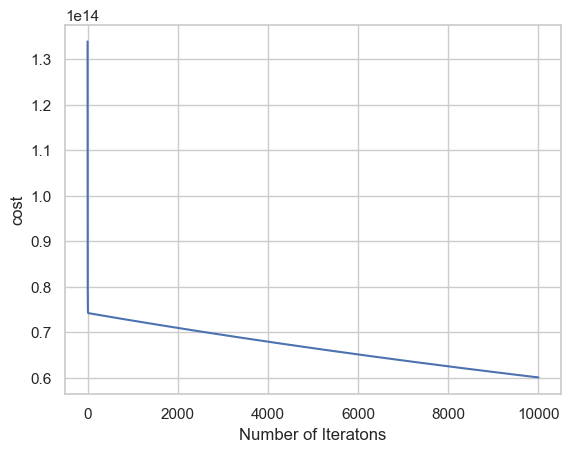





Case 2 : Train = 10 % Test = 90%
RMSE :  10578.144709387498
R2 score:  0.239456069643034


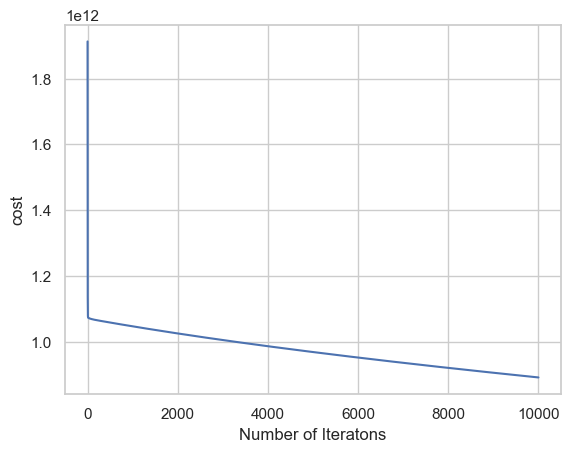

In [370]:
# Performaing Model Building using Gradient Descent

import matplotlib.pylab as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#For Gradient descent we need to intialize an extra column in the data to match theta(zero) coefficient


    

def gradient_descent_reg(X,Y, learning_rate , iterations):
    
    data_points = X.shape[0]
    ones = np.ones((data_points,1))
    
    #concatenate 'ones' column into Data as first column. 
    X_GD = np.concatenate((ones,X),axis=1)
    number_of_features = X_GD.shape[1]

    #Initialize Theta(Coefficient) array 

    theta = np.ones(number_of_features)

    #calculate the initial hypotheis 

    hypotheis = np.dot(X_GD,theta)
    
    #array to store cost which will be of size iterations
    cost = np.ones(iterations)
    
#    print("h shape",hypotheis.shape[0])
#    print("y shape",Y.shape[0])
#    print("X shape",X_GD.shape[0])
    
    #iterations
    for i in range(0,iterations):
        #calculate theta(zero0) first
        theta[0] = theta[0] -  (learning_rate/data_points) * (sum(hypotheis - Y))
        #iterate through all remaning data points
        for j in range(1, number_of_features):
            theta[j] = theta[j] - (learning_rate/data_points) * sum((hypotheis - Y)*X_GD[:,j])
        
        #new hypothesis
        hypotheis = np.dot(X_GD,theta)
        
        #caculate cost for each iterations
        cost[i] = (1/2*data_points) * sum(np.square(hypotheis - Y))
    return cost, theta


#Case 1 : Train = 80 % Test = 20%

print("Gradient Descent Evaluation.............")

print("Case 1 : Train = 80 % Test = 20% Output")

X_train_gd1,X_test_gd1,Y_train_gd1,Y_test_gd1 = train_test_split(X_tranformed,Y, test_size=0.2, random_state=6)

cost, theta = gradient_descent_reg(X_train_gd1,Y_train_gd1,0.0001,10000)
theta
#print("Minimum Cost",np.min(cost))
#print("Last Cost",cost[-1])




#Metrix calculation
#create new 1's column for X(zero) 
ones_for_testing = np.ones((X_test_gd1.shape[0],1))
X_test = np.concatenate((ones_for_testing, X_test_gd1),axis=1)
Y_pred = np.dot(X_test,theta)
print("RMSE : ",np.sqrt(mean_squared_error(Y_test_gd1, Y_pred)))
print("R2 score: ",r2_score(Y_test_gd1,Y_pred))

#draw plot
plt.plot(cost)
plt.xlabel("Number of Iteratons")
plt.ylabel("cost")
plt.show()

print("")
print("")
print("")
print("")

print("Case 2 : Train = 10 % Test = 90%")

X_train_gd2,X_test_gd2,Y_train_gd2,Y_test_gd2 = train_test_split(X_tranformed,Y, test_size=0.9, random_state=6)

cost, theta = gradient_descent_reg(X_train_gd2,Y_train_gd2,0.0001,10000)
theta
#print("Minimum Cost",np.min(cost))
#print("Last Cost",cost[-1])



#Metrix calculation
#create new 1's column for X(zero) 
ones_for_testing = np.ones((X_test_gd2.shape[0],1))
X_test = np.concatenate((ones_for_testing, X_test_gd2),axis=1)
Y_pred = np.dot(X_test,theta)
print("RMSE : ",np.sqrt(mean_squared_error(Y_test_gd2, Y_pred)))
print("R2 score: ",r2_score(Y_test_gd2,Y_pred))
#draw plot
plt.plot(cost)
plt.xlabel("Number of Iteratons")
plt.ylabel("cost")
plt.show()

In [371]:
# Performaing Model Building using stochastic Gradient Descent
# Implementing Stochastic gradiend Descent using SGDRegressor from sklearn lib

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Case 1 : Train = 80 % Test = 20%

print("Stochastic Gradient Descent Evaluation.............")

print("Case 1 : Train = 80 % Test = 20% Output")

#Split the data
X_train_sgd_1,X_test_sgd_1,Y_train_sgd_1,Y_test_sgd_1 = train_test_split(X_tranformed,Y, test_size=0.2, random_state=6)


sgd1 = SGDRegressor(alpha=0.0001,max_iter=3000)
sgd1.fit(X_train_sgd_1,Y_train_sgd_1)

#print(Y_test_sgd_1.shape)
#print(type(Y_test_sgd_1))

#print(X_test_sgd_1.shape)

#Predict the Y 

Y_Pred = sgd1.predict(X_test_sgd_1)

print("R-squared Score",sgd1.score(X_train_sgd_1,Y_train_sgd_1))


print("")
print("")
print("")

#Case 2 : Train = 10 % Test = 90%


print("Case 2 : Train = 10 % Test = 90%")

#Split the data
X_train_sgd_2,X_test_sgd_2,Y_train_sgd_2,Y_test_sgd_2 = train_test_split(X_tranformed,Y, test_size=0.9, random_state=6)


sgd1 = SGDRegressor(alpha=0.0001,max_iter=3000)
sgd1.fit(X_train_sgd_2,Y_train_sgd_2)


Y_Pred = sgd1.predict(X_test_sgd_2)

print("R-squared Score",sgd1.score(X_test_sgd_2,Y_test_sgd_2))


Stochastic Gradient Descent Evaluation.............
Case 1 : Train = 80 % Test = 20% Output
R-squared Score -9779241651439060.0



Case 2 : Train = 10 % Test = 90%
R-squared Score -5821658136316342.0


Mini Batch Gradient Descent Evaluation.............
Case 1 : Train = 80 % Test = 20% Output
RMSE :  10436.811290188662
R2 score:  0.2493515379171588


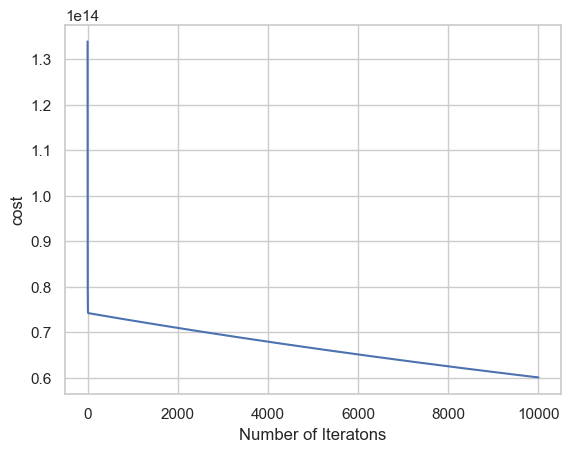





Case 2 : Train = 10 % Test = 90%
RMSE :  10578.144709387498
R2 score:  0.239456069643034


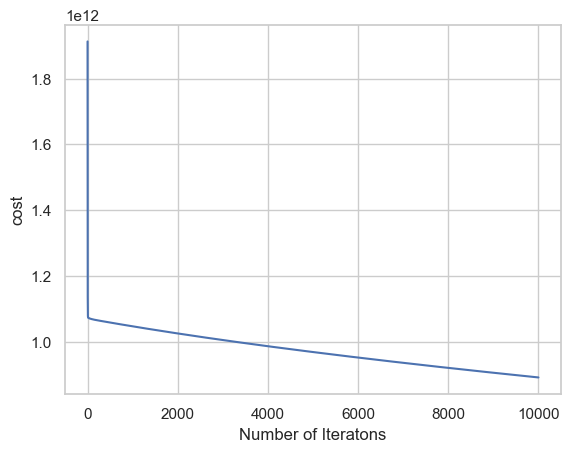

In [372]:
# Performaing Model Building using Mini batch Gradient Descent

import matplotlib.pylab as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#For Mini batch Gradient descent we need to intialize an extra column in the data to match theta(zero) coefficient

# function to create a list containing mini-batches

def create_mini_batches(X, Y, batch_size):
    mini_batches = []
    data = np.hstack((X, Y))
    np.random.shuffle(data)
    # Number of batches
    n_minibatches = data.shape[0]
    i = 0
 
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    # For items which are < than batch_size
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches
    

def mini_batch_gradient_descent_reg(X,Y, learning_rate , iterations,batch_size):
    
    data_points = X.shape[0]
    ones = np.ones((data_points,1))
    
    #concatenate 'ones' column into Data as first column. 
    X_GD = np.concatenate((ones,X),axis=1)
    number_of_features = X_GD.shape[1]

    #Initialize Theta(Coefficient) array 

    theta = np.ones(number_of_features)

    #calculate the initial hypotheis 

    hypotheis = np.dot(X_GD,theta)
    
    #array to store cost which will be of size iterations
    cost = np.ones(iterations)
    
#    print("h shape",hypotheis.shape[0])
#    print("y shape",Y.shape[0])
#    print("X shape",X_GD.shape[0])
    
    #iterations
    for i in range(0,iterations):
        mini_batches = create_mini_batches(X,Y,batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            #calculate theta(zero0) first
            theta[0] = theta[0] -  (learning_rate/data_points) * (sum(hypotheis - y_mini))
            #iterate through all remaning data points
            for j in range(1, number_of_features):
                theta[j] = theta[j] - (learning_rate/data_points) * sum((hypotheis - Y)*X_mini[:,j])

            #new hypothesis
            hypotheis = np.dot(X_mini,theta)

            #caculate cost for each iterations
            cost[i] = (1/2*data_points) * sum(np.square(hypotheis - y_mini))
    return cost, theta


#Case 1 : Train = 80 % Test = 20%

print("Mini Batch Gradient Descent Evaluation.............")

print("Case 1 : Train = 80 % Test = 20% Output")

X_train_mini_1,X_test_mini_1,Y_train_mini_1,Y_test_mini_1 = train_test_split(X_tranformed,Y, test_size=0.2, random_state=6)

cost, theta = gradient_descent_reg(X_train_mini_1,Y_train_mini_1,0.0001,10000)
theta
#print("Minimum Cost",np.min(cost))
#print("Last Cost",cost[-1])




#Metrix calculation
#create new 1's column for X(zero) 
ones_for_testing = np.ones((X_test_mini_1.shape[0],1))
X_test_mini = np.concatenate((ones_for_testing, X_test_mini_1),axis=1)
Y_pred = np.dot(X_test_mini,theta)

print("RMSE : ",np.sqrt(mean_squared_error(Y_test_mini_1, Y_pred)))
print("R2 score: ",r2_score(Y_test_mini_1,Y_pred))

#draw plot
plt.plot(cost)
plt.xlabel("Number of Iteratons")
plt.ylabel("cost")
plt.show()

print("")
print("")
print("")
print("")

print("Case 2 : Train = 10 % Test = 90%")

X_train_mini_2,X_test_mini_2,Y_train_mini_2,Y_test_mini_2 = train_test_split(X_tranformed,Y, test_size=0.9, random_state=6)

cost, theta = gradient_descent_reg(X_train_mini_2,Y_train_mini_2,0.0001,10000)
theta
#print("Minimum Cost",np.min(cost))
#print("Last Cost",cost[-1])



#Metrix calculation
#create new 1's column for X(zero) 
ones_for_testing = np.ones((X_test_mini_2.shape[0],1))
X_mini_test = np.concatenate((ones_for_testing, X_test_mini_2),axis=1)
Y_pred = np.dot(X_mini_test,theta)

print("RMSE : ",np.sqrt(mean_squared_error(Y_test_mini_2, Y_pred)))
print("R2 score: ",r2_score(Y_test_mini_2,Y_pred))
#draw plot
plt.plot(cost)
plt.xlabel("Number of Iteratons")
plt.ylabel("cost")
plt.show()

In [ ]:
# using LinerGression Sk learn lib we got 77 % of accuracy when test data was 20% of total data. Same accuracy was reduced to 72 % when test data changed to 90%
# When data Points are huge then its better to use Stochastic Gradient descent as less calculations required in Stochastic Gradient descent because 1 data point is cosidered and parameters are calculated. But it introduces lot of noise 
#